In [1]:
#Description: this program uses the three moving averages crossover strategy to determine when to buy and sell a stock.

In [2]:
#import the libraries:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Store the data into a variable: Use the csv file available in the Data folder 
df=pd.read_csv('C:/Users/franc/Desktop/Google Colab/Data/AAPL.csv')
#Set the date column as an index. 
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show the dataframe
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-07-03,2019-07-03,203.279999,204.440002,202.690002,204.410004,201.999237,11362000
2019-07-05,2019-07-05,203.350006,205.080002,202.899994,204.229996,201.821350,17265500
2019-07-08,2019-07-08,200.809998,201.399994,198.410004,200.020004,197.661011,25338600
2019-07-09,2019-07-09,199.199997,201.509995,198.809998,201.240005,198.866638,20578000
2019-07-10,2019-07-10,201.850006,203.729996,201.559998,203.229996,200.833160,17897100
...,...,...,...,...,...,...,...
2020-06-26,2020-06-26,364.410004,365.320007,353.019989,353.630005,353.630005,51314200
2020-06-29,2020-06-29,353.250000,362.170013,351.279999,361.779999,361.779999,32661500
2020-06-30,2020-06-30,360.079987,365.980011,360.000000,364.799988,364.799988,35055800
2020-07-01,2020-07-01,365.119995,367.359985,363.910004,364.109985,364.109985,27684300


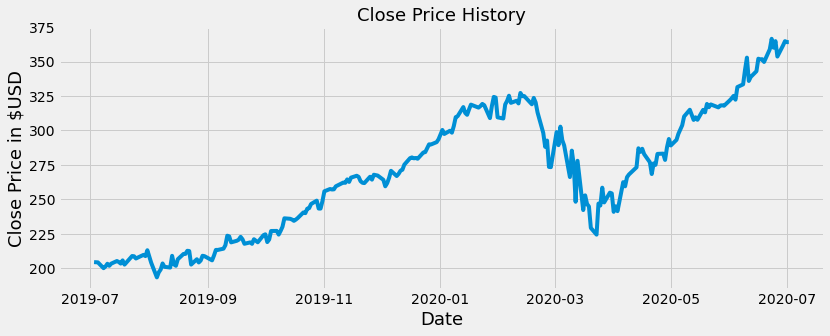

In [9]:
#Plot the Close Price with matplotlib. Add few lables
plt.figure(figsize=(12.2, 4.5))
plt.title("Close Price History", fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in $USD', fontsize=18)
plt.show();

In [10]:
#Calculate the three moving averages 
#calculate the short/fast Exponential moving average
shortEMA=df.Close.ewm(span=5, adjust=False).mean()
#calculate the middle exponential moving average
middleEMA= df.Close.ewm(span=21, adjust=False).mean()
#Caluclate the long/slow exponential moving average 
longEMA= df.Close.ewm(span=63, adjust=False).mean()


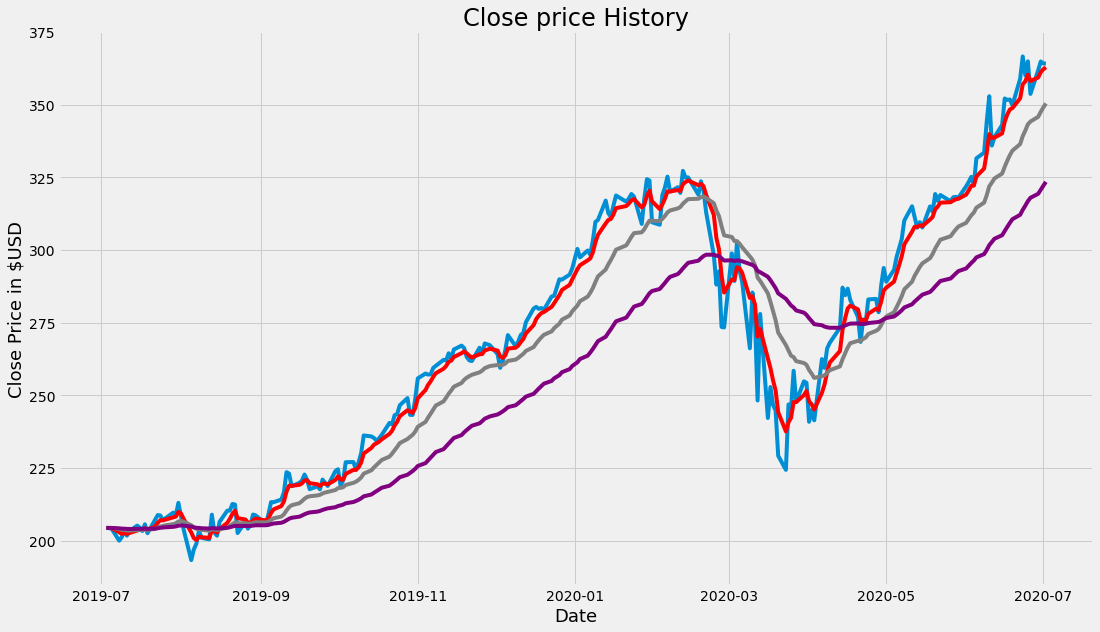

In [16]:
#visualize the closing price and the exponential moving averages
plt.figure(figsize=(16.5, 9.5))
plt.title("Close price History", fontsize=24)
plt.plot(df['Close'])
plt.plot(shortEMA, label="short/fastEMA", color='red')
plt.plot(middleEMA, label="middle EMA", color='gray')
plt.plot(longEMA, label="Lonf EMA", color='purple')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in $USD', fontsize=18)
plt.show();

In [17]:
#add the exponential moving averages to the data set
df['Short']=shortEMA
df['Middle']=middleEMA
df['Long']=longEMA
df

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long
2019-07-03,2019-07-03,203.279999,204.440002,202.690002,204.410004,201.999237,11362000,204.410004,204.410004,204.410004
2019-07-05,2019-07-05,203.350006,205.080002,202.899994,204.229996,201.821350,17265500,204.350001,204.393640,204.404379
2019-07-08,2019-07-08,200.809998,201.399994,198.410004,200.020004,197.661011,25338600,202.906669,203.996036,204.267367
2019-07-09,2019-07-09,199.199997,201.509995,198.809998,201.240005,198.866638,20578000,202.351114,203.745488,204.172762
2019-07-10,2019-07-10,201.850006,203.729996,201.559998,203.229996,200.833160,17897100,202.644075,203.698625,204.143301
...,...,...,...,...,...,...,...,...,...,...
2020-06-26,2020-06-26,364.410004,365.320007,353.019989,353.630005,353.630005,51314200,358.052896,344.154203,317.929449
2020-06-29,2020-06-29,353.250000,362.170013,351.279999,361.779999,361.779999,32661500,359.295264,345.756548,319.299779
2020-06-30,2020-06-30,360.079987,365.980011,360.000000,364.799988,364.799988,35055800,361.130172,347.487770,320.721661
2020-07-01,2020-07-01,365.119995,367.359985,363.910004,364.109985,364.109985,27684300,362.123443,348.998880,322.077546


In [18]:
#trading strategy to buy and sell 
def buy_sell_function(data):
  buy_list=[]
  sell_list=[]
  flag_long=False
  flag_short=False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i]< data['Middle'][i] and flag_long ==False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short=True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long ==False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long=True
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
  return (buy_list,sell_list)

In [19]:
#add the buy and sell signals to the dataset
df['Buy'] = buy_sell_function(df)[0]
df['Sell']= buy_sell_function(df)[1]

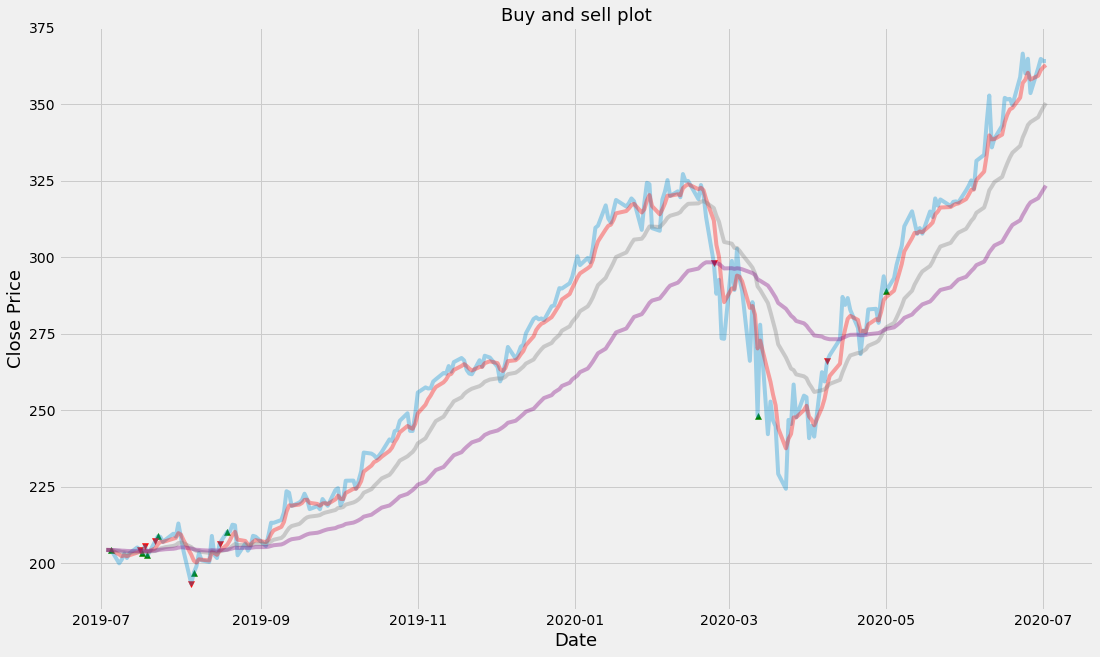

In [21]:
#Visually show the stock buy and sell signals
plt.figure(figsize=(16.5, 10))
plt.title("Buy and sell plot", fontsize=18)
plt.plot(df['Close'], alpha=0.35)
plt.plot(shortEMA, label="short/fastEMA", color='red', alpha=0.35)
plt.plot(middleEMA, label="middle EMA", color='gray', alpha=0.35)
plt.plot(longEMA, label="Lonf EMA", color='purple', alpha=0.35)
plt.scatter(df.index, df['Buy'], color='green', marker="^", alpha=1)
plt.scatter(df.index, df['Sell'], color='red', marker="v", alpha=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show();